# **Import necessary libraries**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             roc_curve, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Linear regression

Linear Regression - MSE: 2426132005.26, R²: 0.68


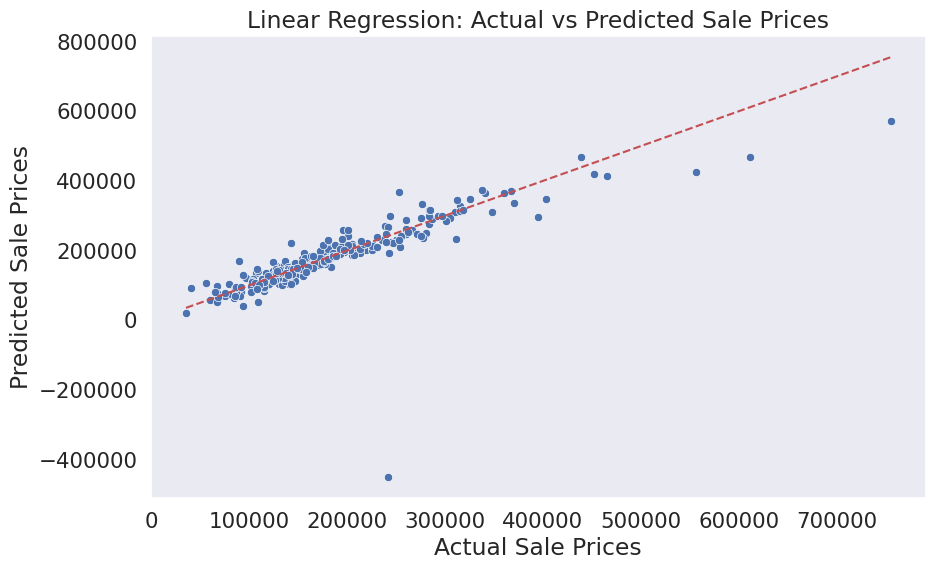

In [57]:
# Load the dataset
train = pd.read_csv('train.csv')  # Load your training dataset
target = 'SalePrice'  # Target variable

# Preprocessing
X = train.drop(columns=['Id', target])  # Features
y = train[target]  # Target variable

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values for numeric features with mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

# Convert categorical features to dummy variables
X_dummies = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = linear_model.predict(X_val)  # Predict on validation set

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_val, y_pred)  # Calculate R² Score

# Output performance metrics
print(f'Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}')

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred)
plt.title('Linear Regression: Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Reference line
plt.grid()
plt.show()

# Ridge and Lasso regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Ridge Regression - MSE: 936310458.25, R²: 0.88
Lasso Regression - MSE: 2403332781.70, R²: 0.69


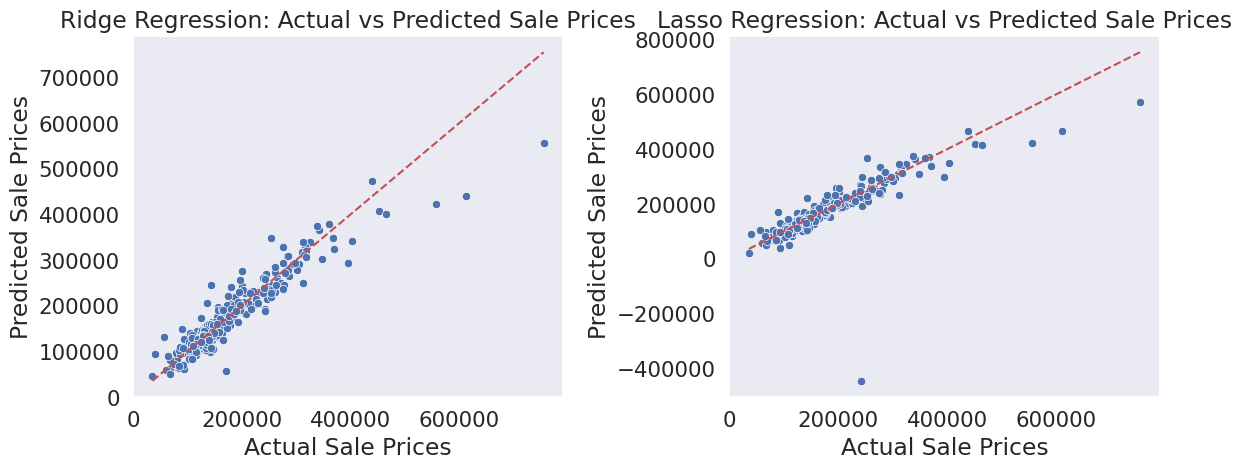

In [58]:

# Load the dataset
train = pd.read_csv('train.csv')  # Load your training dataset
target = 'SalePrice'  # Target variable

# Preprocessing
X = train.drop(columns=['Id', target])  # Features
y = train[target]  # Target variable

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values for numeric features with mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

# Convert categorical features to dummy variables
X_dummies = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha value
ridge_model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred_ridge = ridge_model.predict(X_val)  # Predict on validation set

# Calculate performance metrics for Ridge
mse_ridge = mean_squared_error(y_val, y_pred_ridge)  # Calculate Mean Squared Error
r2_ridge = r2_score(y_val, y_pred_ridge)  # Calculate R² Score

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha value
lasso_model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred_lasso = lasso_model.predict(X_val)  # Predict on validation set

# Calculate performance metrics for Lasso
mse_lasso = mean_squared_error(y_val, y_pred_lasso)  # Calculate Mean Squared Error
r2_lasso = r2_score(y_val, y_pred_lasso)  # Calculate R² Score

# Output performance metrics
print(f'Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}')
print(f'Lasso Regression - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}')

# Visualization of Ridge Predictions vs Actual Values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_val, y=y_pred_ridge)
plt.title('Ridge Regression: Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Reference line
plt.grid()

# Visualization of Lasso Predictions vs Actual Values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val, y=y_pred_lasso)
plt.title('Lasso Regression: Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Reference line
plt.grid()

plt.tight_layout()
plt.show()


# Logistic regression

Logistic Regression - Accuracy: 0.96
Confusion Matrix:
 [[151  10]
 [  2 129]]


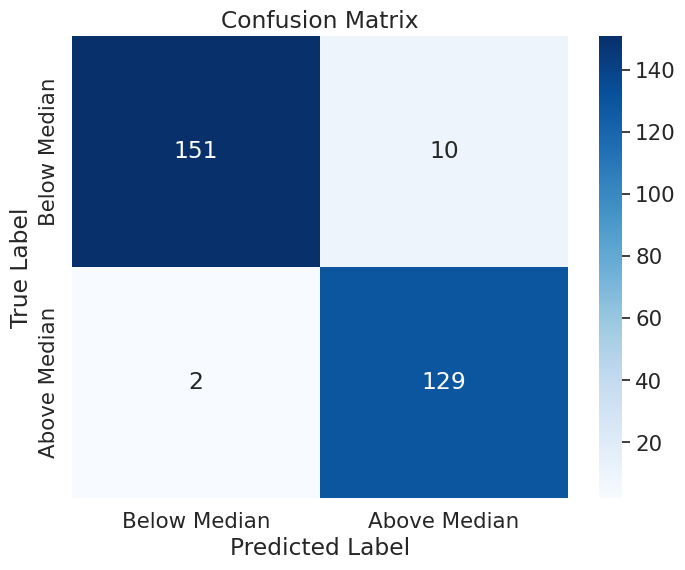

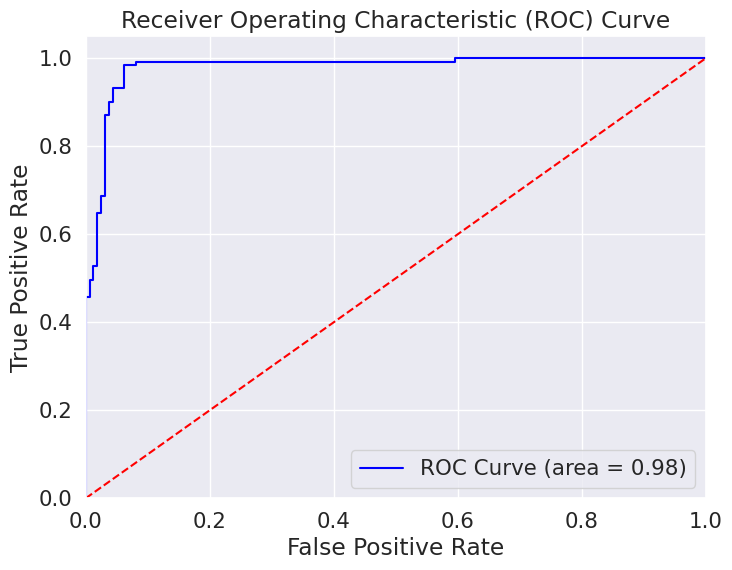

In [59]:

# Load the dataset
train = pd.read_csv('train.csv')  # Load your training dataset
target = 'SalePrice'  # Target variable

# Preprocessing
X = train.drop(columns=['Id', target])  # Features
y = train[target]  # Target variable

# Create a binary target variable
median_price = y.median()
y_binary = (y > median_price).astype(int)  # 1 if above median, 0 if below or equal

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values for numeric features with mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

# Convert categorical features to dummy variables
X_dummies = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])

# Logistic Regression
logistic_model = LogisticRegression(max_iter=2000)  # Increase max_iter for convergence
logistic_model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred_prob = logistic_model.predict_proba(X_val)[:, 1]  # Probability of positive class
y_pred = logistic_model.predict(X_val)  # Class predictions

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Output accuracy and confusion matrix
print(f'Logistic Regression - Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



# Decision Tree

Decision Tree - Accuracy: 0.89
Confusion Matrix:
 [[137  24]
 [  8 123]]


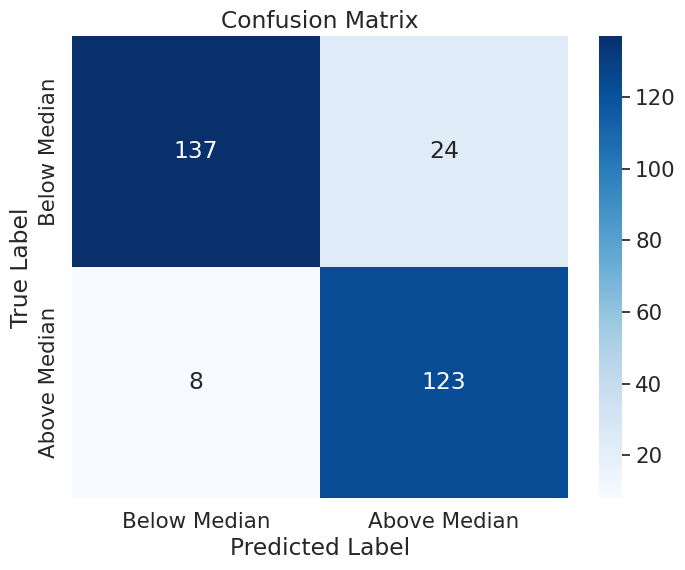

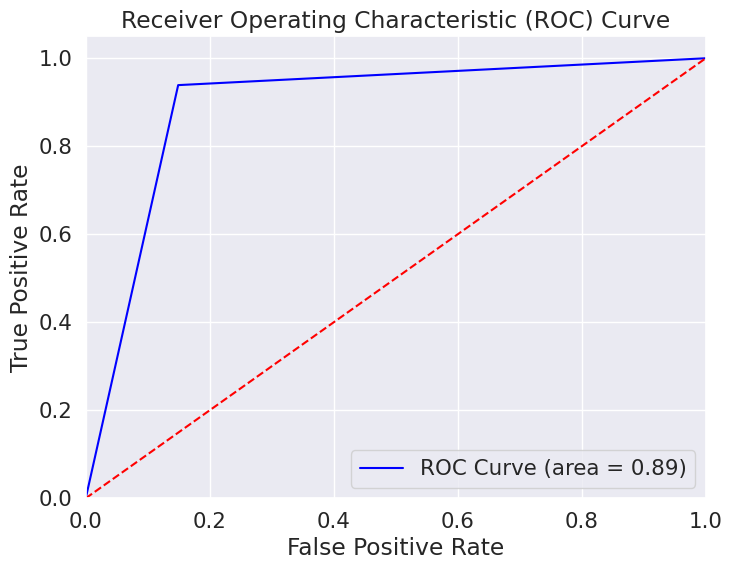

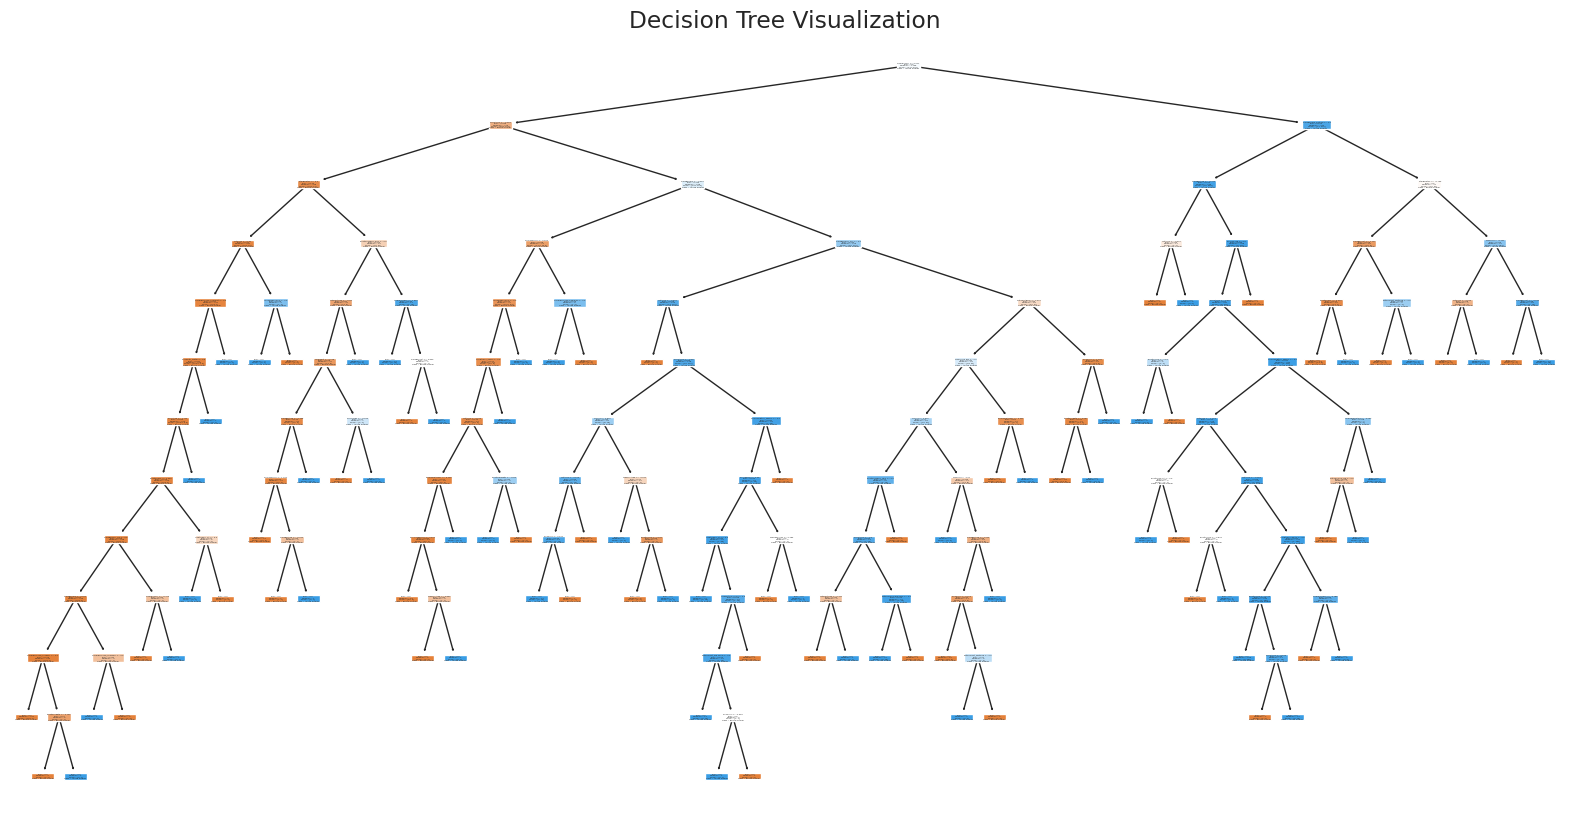

In [60]:


# Load the dataset
train = pd.read_csv('train.csv')  # Load your training dataset
target = 'SalePrice'  # Target variable

# Preprocessing
X = train.drop(columns=['Id', target])  # Features
y = train[target]  # Target variable

# Create a binary target variable
median_price = y.median()
y_binary = (y > median_price).astype(int)  # 1 if above median, 0 if below or equal

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values for numeric features with mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

# Convert categorical features to dummy variables
X_dummies = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = dt_model.predict(X_val)  # Class predictions
y_pred_prob = dt_model.predict_proba(X_val)[:, 1]  # Probability of positive class

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Output accuracy and confusion matrix
print(f'Decision Tree - Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Below Median', 'Above Median'])
plt.title('Decision Tree Visualization')
plt.show()


# Random forest

Random Forest - Accuracy: 0.95
Confusion Matrix:
 [[152   9]
 [  6 125]]


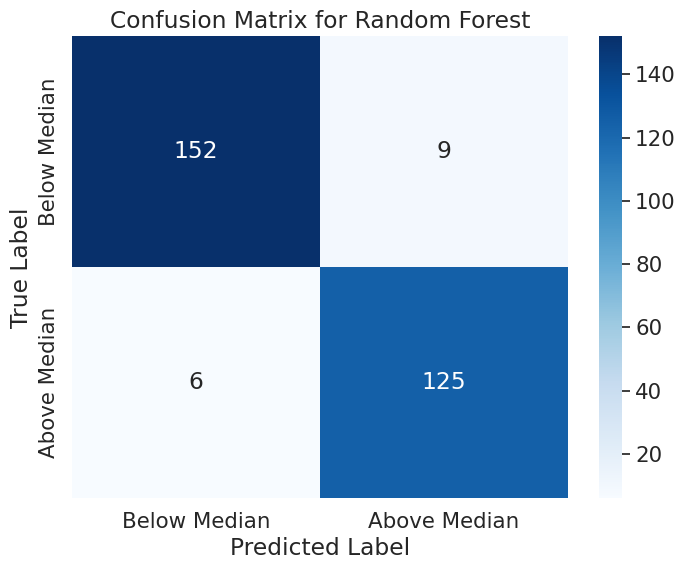

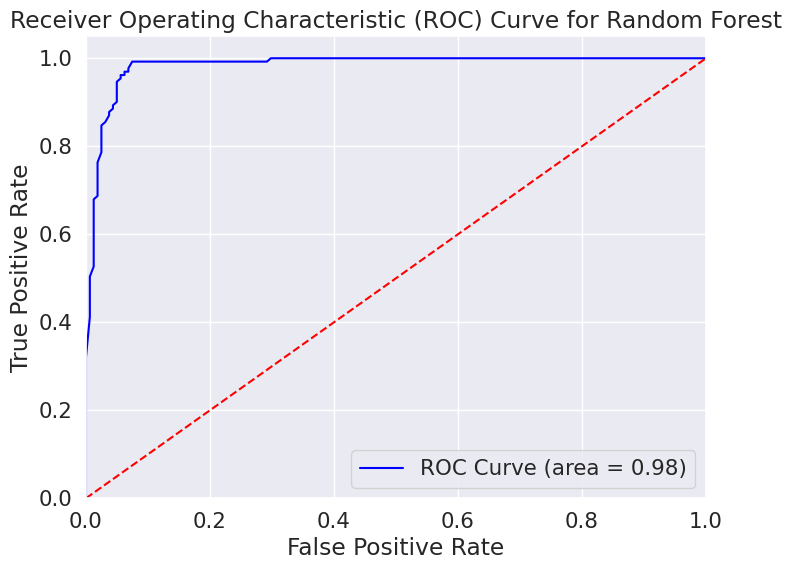

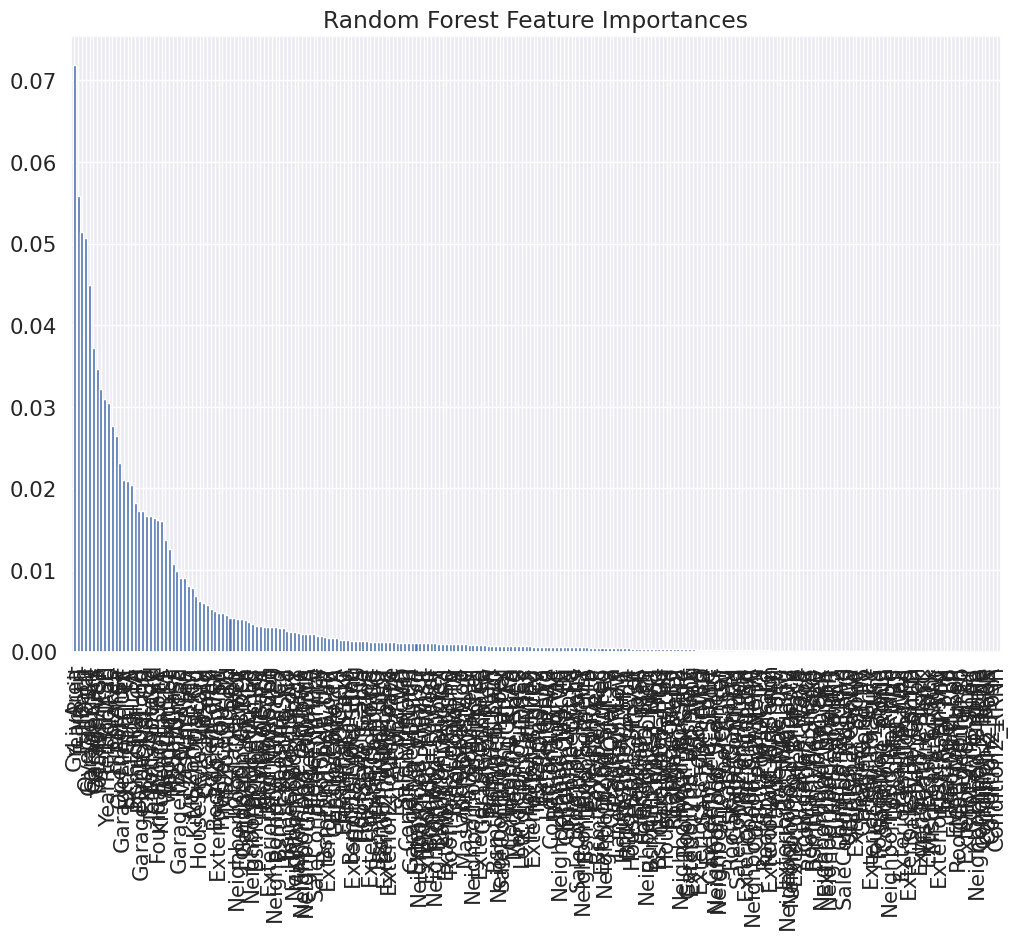

In [65]:

# Load the dataset
train = pd.read_csv('train.csv')  # Load your training dataset
target = 'SalePrice'  # Target variable

# Preprocessing
X = train.drop(columns=['Id', target])  # Features
y = train[target]  # Target variable

# Create a binary target variable
median_price = y.median()
y_binary = (y > median_price).astype(int)  # 1 if above median, 0 if below or equal

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values for numeric features with mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

# Convert categorical features to dummy variables
X_dummies = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = rf_model.predict(X_val)  # Class predictions
y_pred_prob = rf_model.predict_proba(X_val)[:, 1]  # Probability of positive class

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Output accuracy and confusion matrix
print(f'Random Forest - Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Naive Bayes

Missing values in each column:
Feature1     1
Feature2     0
SalePrice    0
dtype: int64
Accuracy: 0.50
ROC AUC: 0.00


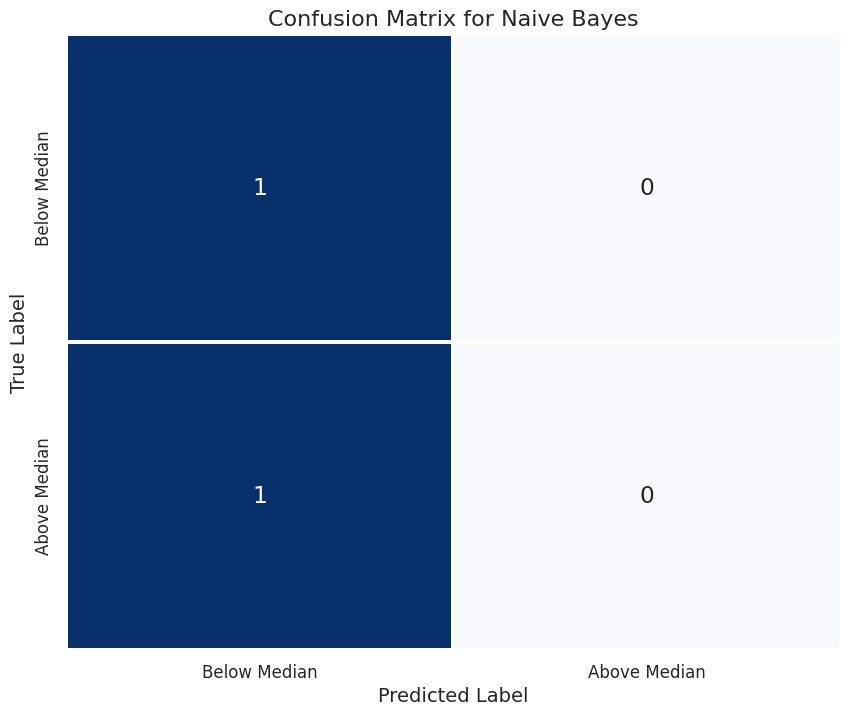

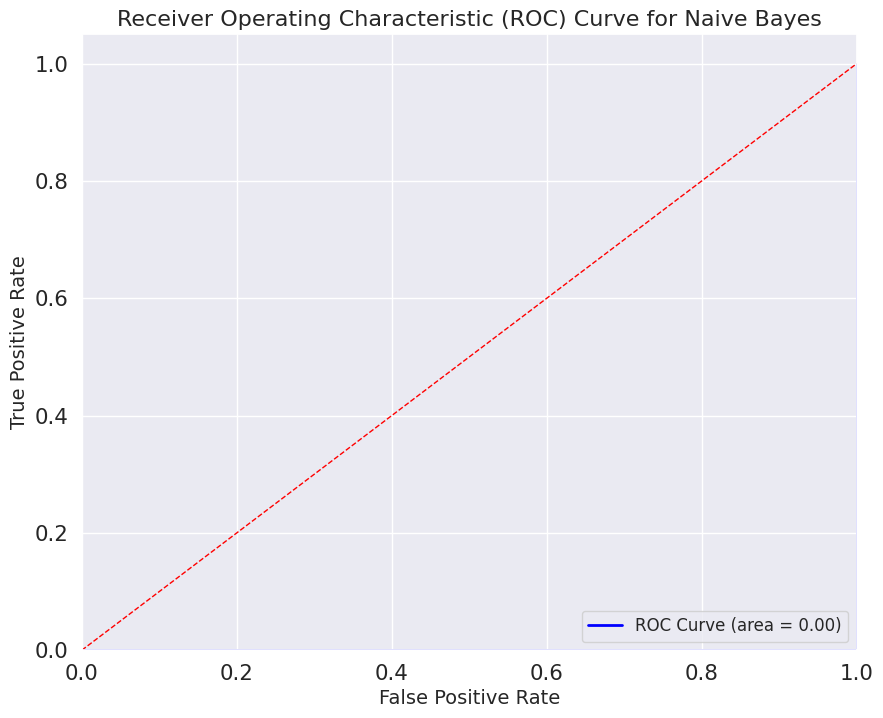

In [64]:


# Create a dummy dataset (you can replace this with your actual dataset)
data = {
    'Feature1': [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'SalePrice': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0]  # Binary target variable
}

# Load the dataset into a DataFrame
train = pd.DataFrame(data)

# Preprocess the data
# Identify target variable and features
target = 'SalePrice'  # Replace with your actual target column name

# Check for missing values
print("Missing values in each column:")
print(train.isnull().sum())

# Split features and target
X = train.drop(columns=[target])
y = train[target]

# Handle missing values
# Impute missing numerical values
num_features = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(num_features)

# Handle categorical variables with one-hot encoding
X_categorical = pd.get_dummies(X.select_dtypes(include=[object]), drop_first=True)
X_processed = np.hstack((X_imputed, X_categorical.values))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_val)
y_pred_proba = nb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'],
            cbar=False, linewidths=1.5)
plt.title('Confusion Matrix for Naive Bayes', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualize ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


# Support vector Machine

Missing values in each column:
Feature1     1
Feature2     0
SalePrice    0
dtype: int64
Accuracy: 0.50
ROC AUC: 1.00


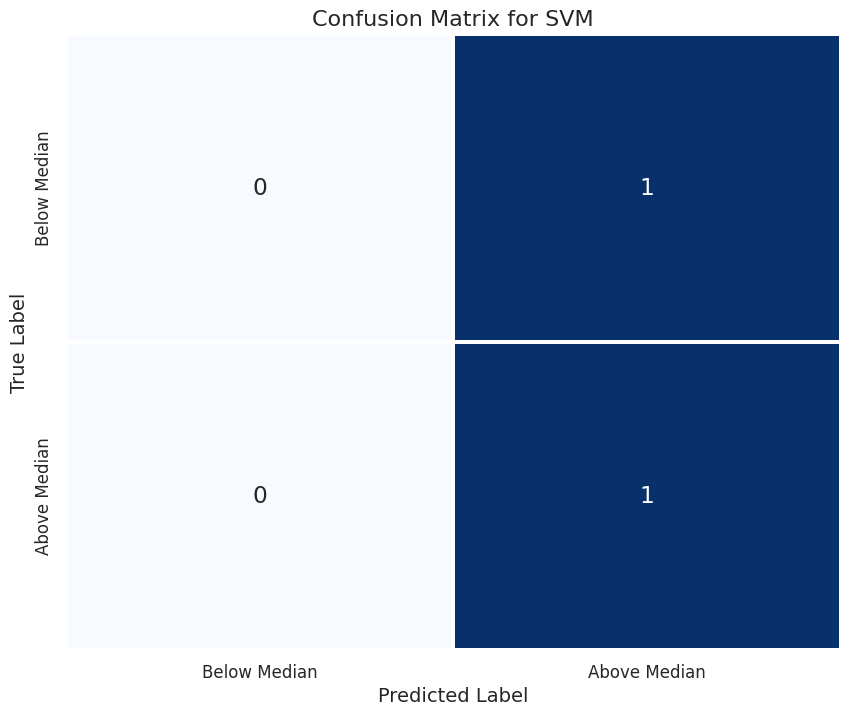

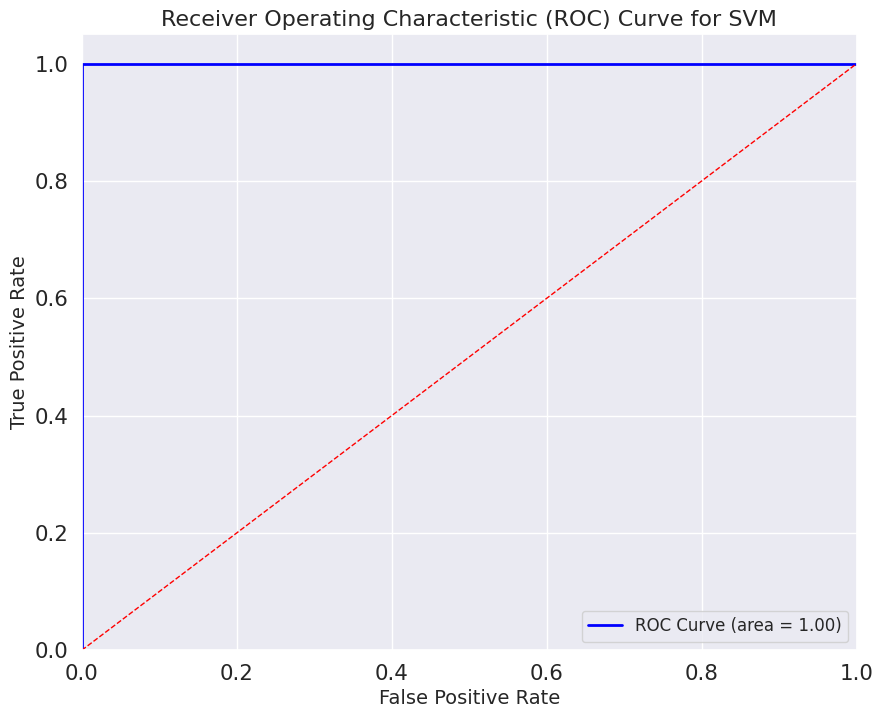

In [66]:

# Create a dummy dataset (you can replace this with your actual dataset)
data = {
    'Feature1': [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'SalePrice': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0]  # Binary target variable
}

# Load the dataset into a DataFrame
train = pd.DataFrame(data)

# Preprocess the data
# Identify target variable and features
target = 'SalePrice'  # Replace with your actual target column name

# Check for missing values
print("Missing values in each column:")
print(train.isnull().sum())

# Split features and target
X = train.drop(columns=[target])
y = train[target]

# Handle missing values
# Impute missing numerical values
num_features = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(num_features)

# Handle categorical variables with one-hot encoding
X_categorical = pd.get_dummies(X.select_dtypes(include=[object]), drop_first=True)
X_processed = np.hstack((X_imputed, X_categorical.values))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the SVM model
svm_model = SVC(probability=True)  # Use probability=True for ROC curve
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_val)
y_pred_proba = svm_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'],
            cbar=False, linewidths=1.5)
plt.title('Confusion Matrix for SVM', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualize ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


# KNN

Missing values in each column:
Feature1     1
Feature2     0
SalePrice    0
dtype: int64
Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



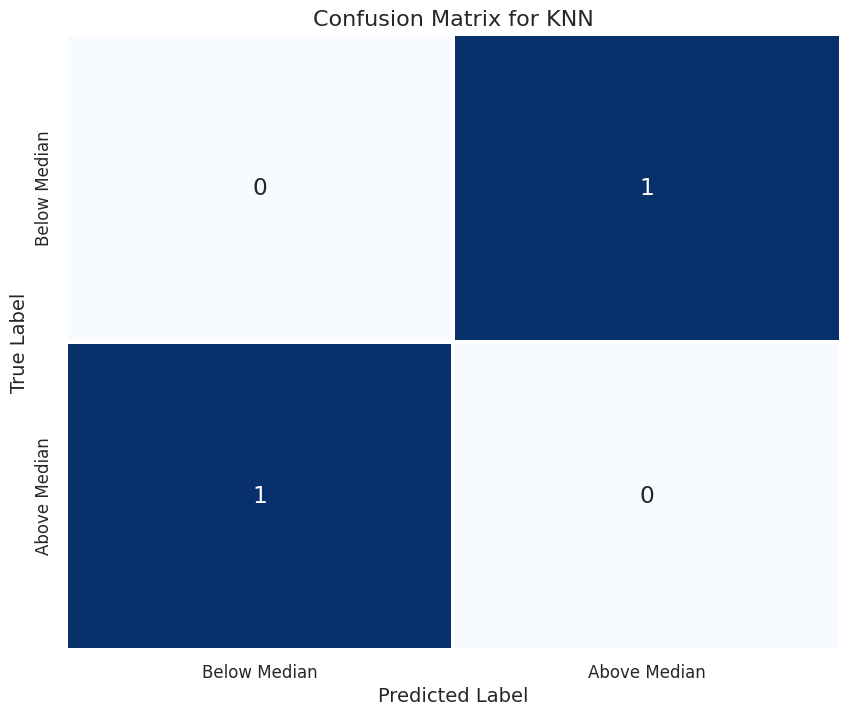

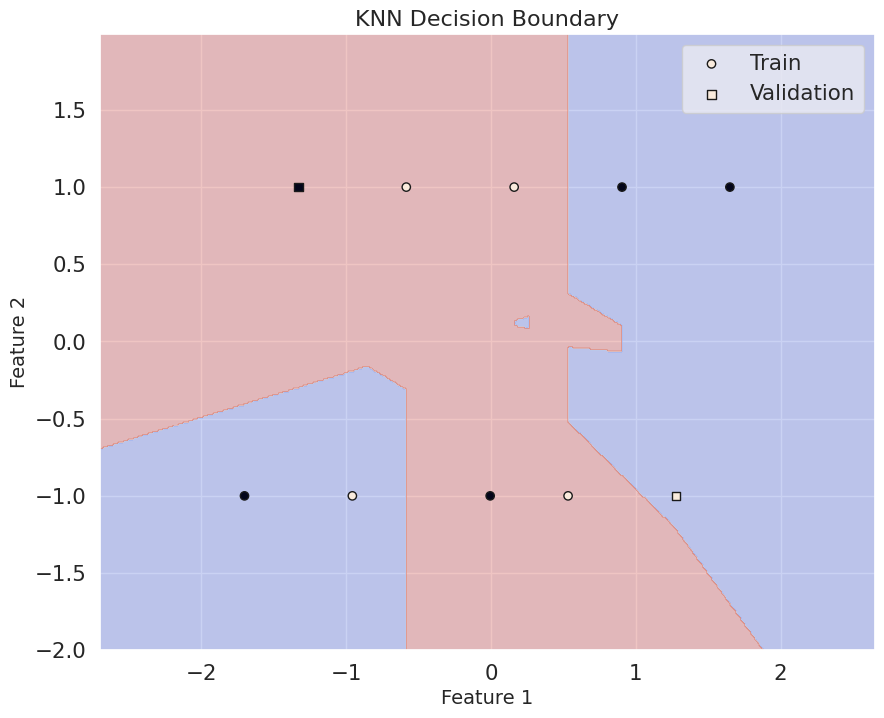

In [67]:


# Create a dummy dataset (you can replace this with your actual dataset)
data = {
    'Feature1': [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'SalePrice': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0]  # Binary target variable
}

# Load the dataset into a DataFrame
train = pd.DataFrame(data)

# Preprocess the data
# Identify target variable and features
target = 'SalePrice'  # Replace with your actual target column name

# Check for missing values
print("Missing values in each column:")
print(train.isnull().sum())

# Split features and target
X = train.drop(columns=[target])
y = train[target]

# Handle missing values
# Impute missing numerical values
num_features = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(num_features)

# Handle categorical variables with one-hot encoding
X_categorical = pd.get_dummies(X.select_dtypes(include=[object]), drop_first=True)
X_processed = np.hstack((X_imputed, X_categorical.values))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'],
            cbar=False, linewidths=1.5)
plt.title('Confusion Matrix for KNN', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Optional: Visualizing the decision boundary (only applicable for 2D feature space)
if X_processed.shape[1] == 2:  # Check if we have 2 features for visualization
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, edgecolors='k', marker='s', label='Validation')
    plt.title('KNN Decision Boundary', fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend()
    plt.show()


# XG Boost

Missing values in each column:
Feature1     1
Feature2     0
SalePrice    0
dtype: int64
Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

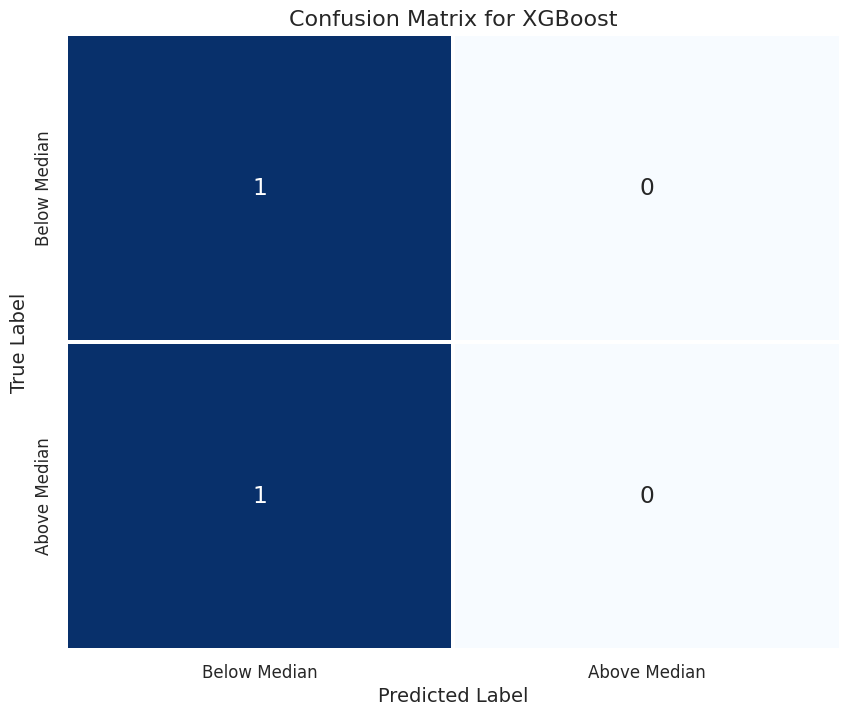

In [68]:


# Create a dummy dataset (you can replace this with your actual dataset)
data = {
    'Feature1': [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'SalePrice': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0]  # Binary target variable
}

# Load the dataset into a DataFrame
train = pd.DataFrame(data)

# Preprocess the data
# Identify target variable and features
target = 'SalePrice'  # Replace with your actual target column name

# Check for missing values
print("Missing values in each column:")
print(train.isnull().sum())

# Split features and target
X = train.drop(columns=[target])
y = train[target]

# Handle missing values
# Impute missing numerical values
num_features = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(num_features)

# Handle categorical variables with one-hot encoding
X_categorical = pd.get_dummies(X.select_dtypes(include=[object]), drop_first=True)
X_processed = np.hstack((X_imputed, X_categorical.values))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Specify eval_metric for compatibility
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'],
            cbar=False, linewidths=1.5)
plt.title('Confusion Matrix for XGBoost', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# ADA Boost

Missing values in each column:
Feature1     1
Feature2     0
SalePrice    0
dtype: int64
Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


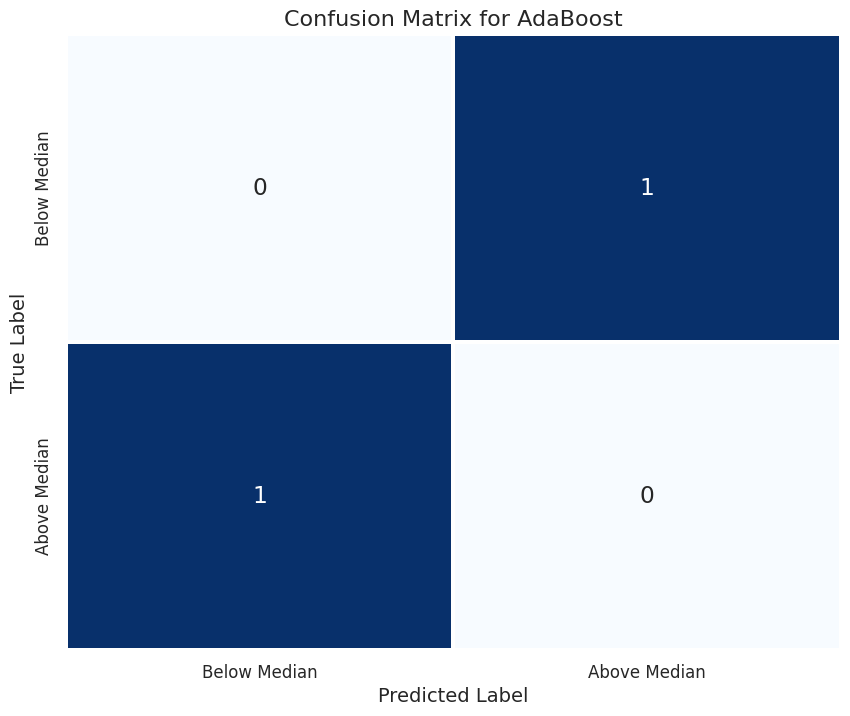

In [69]:

# Create a dummy dataset (you can replace this with your actual dataset)
data = {
    'Feature1': [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10],
    'Feature2': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'SalePrice': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0]  # Binary target variable
}

# Load the dataset into a DataFrame
train = pd.DataFrame(data)

# Preprocess the data
# Identify target variable and features
target = 'SalePrice'  # Replace with your actual target column name

# Check for missing values
print("Missing values in each column:")
print(train.isnull().sum())

# Split features and target
X = train.drop(columns=[target])
y = train[target]

# Handle missing values
# Impute missing numerical values
num_features = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(num_features)

# Handle categorical variables with one-hot encoding
X_categorical = pd.get_dummies(X.select_dtypes(include=[object]), drop_first=True)
X_processed = np.hstack((X_imputed, X_categorical.values))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)  # Updated parameter
ada_model.fit(X_train, y_train)

# Predictions
y_pred = ada_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'],
            cbar=False, linewidths=1.5)
plt.title('Confusion Matrix for AdaBoost', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
